In [3]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from hardwares.hardware_params import hardware_params
from model_analyzer import ModelAnalyzer

In [7]:
model_id="meta-llama/Llama-2-13b-hf"
hardware="nvidia_A6000"
analyzer=ModelAnalyzer(model_id,hardware)

use config file configs/Llama.py for meta-llama/Llama-2-13b-hf


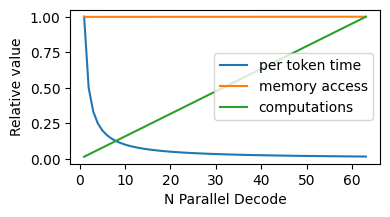

In [34]:
fig=plt.figure(figsize=(4, 2))
ys=[]
mems=[]
computations=[]
use_flashattention=False
n_parallel_decodes=range(1,64)
for n_parallel_decode in n_parallel_decodes:
    result=analyzer.analyze(2048,1,16,16,16,use_flashattention,n_parallel_decode=n_parallel_decode)
    ys.append(result["total_results"]["decode"]["inference_time"]/n_parallel_decode)
    mems.append(result["total_results"]["decode"]["memory_consumption"])
    computations.append(result["total_results"]["decode"]["OPs"])
ys=np.array(ys)
ys/=ys.max()
mems=np.array(mems)
mems/=mems.max()
computations=np.array(computations)
computations/=computations.max()
plt.plot(n_parallel_decodes,ys,label=f"per token time")
plt.plot(n_parallel_decodes,mems,label=f"memory access")
plt.plot(n_parallel_decodes,computations,label=f"computations")
plt.legend()
plt.ylabel("Relative value")
plt.xlabel("N Parallel Decode")
plt.savefig("../output/parallel_decoding.pdf",bbox_inches='tight')